In [183]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import numpy as np
import pandas as pd

from util import engineer_features, prep_X_y

DATA_DIR = Path("./pistachio_1_data")
dyads_df = pd.read_csv(DATA_DIR / "all_dyads.csv")

sorted_dyads_df = dyads_df.sort_values(
    by="ActivityDateTime", key=lambda x: pd.to_datetime(x)
)
cleaned_dyads_dfs = engineer_features(sorted_dyads_df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from hr_model import HrModel
from modeling import (
    TuningMethod,
    eval_model_on_feature_sets,
    retrain_and_predict,
    supersets_to_test,
)

In [185]:
import os

# Params
weeks = (0, 15)
active_hours = (7, 20)
tuning_method: TuningMethod = "balanced_accuracy"
estimator = "xgboost"
# estimator = "lrl2"
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [186]:
no_retrain_results = eval_model_on_feature_sets(
    supersets_to_test=supersets_to_test,
    dfs=cleaned_dyads_dfs,
    weeks=weeks,
    active_hours=active_hours,
    estimator=estimator,
    mode="no_retrain",
    tuning_method=tuning_method,
    verbose=True,
)

Feature sets: watch


  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.5012470941918794 sensitivity: 0.5769230769230769, specificity: 0.38517382413087936
Week 1 AUROC: 0.5889457682281704 sensitivity: 0.7632850241545893, specificity: 0.3790918690601901
Week 2 AUROC: 0.5317886005197764 sensitivity: 0.76, specificity: 0.34262522695717185
Week 3 AUROC: 0.5808839255705949 sensitivity: 0.8115942028985508, specificity: 0.3490278753806512
Week 4 AUROC: 0.5081836929939922 sensitivity: 0.6666666666666666, specificity: 0.3970976253298153
Week 5 AUROC: 0.4829854203569969 sensitivity: 0.6585365853658537, specificity: 0.33854748603351953
Week 6 AUROC: 0.39237895256917 sensitivity: 0.525, specificity: 0.32596343873517786
Week 7 AUROC: 0.5824397976631519 sensitivity: 0.8090909090909091, specificity: 0.33294148380355276
Week 8 AUROC: 0.4310114533923708 sensitivity: 0.5531914893617021, specificity: 0.35182896688087
Week 9 AUROC: 0.5380951993528471 sensitivity: 0.7589285714285714, specificity: 0.32986201510023433
Week 10 AUROC: 0.6295235678640906 sensitivity

  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.42576992991103424 sensitivity: 0.4230769230769231, specificity: 0.43885480572597135
Week 1 AUROC: 0.5267016614888613 sensitivity: 0.6280193236714976, specificity: 0.4551214361140444
Week 2 AUROC: 0.5323048168322119 sensitivity: 0.6066666666666667, specificity: 0.44750614119406174
Week 3 AUROC: 0.5246201126422031 sensitivity: 0.5144927536231884, specificity: 0.5238931834153198
Week 4 AUROC: 0.529366313485138 sensitivity: 0.5057471264367817, specificity: 0.5062365075557688
Week 5 AUROC: 0.5331135032020712 sensitivity: 0.5487804878048781, specificity: 0.4764245810055866
Week 6 AUROC: 0.6043231225296443 sensitivity: 0.55, specificity: 0.48023715415019763
Week 7 AUROC: 0.41899045312054717 sensitivity: 0.43636363636363634, specificity: 0.4535005224660397
Week 8 AUROC: 0.5204713612603991 sensitivity: 0.4574468085106383, specificity: 0.49332674246169056
Week 9 AUROC: 0.3415934048052962 sensitivity: 0.25892857142857145, specificity: 0.46407185628742514
Week 10 AUROC: 0.490097237

  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.5122537709961023 sensitivity: 0.19230769230769232, specificity: 0.6978527607361963
Week 1 AUROC: 0.6489529610414786 sensitivity: 0.42028985507246375, specificity: 0.754065469904963
Week 2 AUROC: 0.5474837124853146 sensitivity: 0.26666666666666666, specificity: 0.7379045177827619
Week 3 AUROC: 0.5678942561982068 sensitivity: 0.2463768115942029, specificity: 0.7265167486530804
Week 4 AUROC: 0.6077072701356205 sensitivity: 0.3448275862068966, specificity: 0.7420244662988726
Week 5 AUROC: 0.5845905436707999 sensitivity: 0.21951219512195122, specificity: 0.7850279329608939
Week 6 AUROC: 0.514252408596838 sensitivity: 0.2, specificity: 0.8123764822134387
Week 7 AUROC: 0.45191056331338464 sensitivity: 0.22727272727272727, specificity: 0.7429467084639498
Week 8 AUROC: 0.43841040796794317 sensitivity: 0.05319148936170213, specificity: 0.8214285714285714
Week 9 AUROC: 0.4985663378212519 sensitivity: 0.09821428571428571, specificity: 0.8694350429575631
Week 10 AUROC: 0.47861235968

  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.5105511422229214 sensitivity: 0.17094017094017094, specificity: 0.7794478527607362
Week 1 AUROC: 0.6366657484351805 sensitivity: 0.2028985507246377, specificity: 0.8609292502639916
Week 2 AUROC: 0.6192680408700914 sensitivity: 0.23333333333333334, specificity: 0.8434262522695717
Week 3 AUROC: 0.5361631376862518 sensitivity: 0.13768115942028986, specificity: 0.8691731084563129
Week 4 AUROC: 0.681834724278542 sensitivity: 0.28735632183908044, specificity: 0.833893019908851
Week 5 AUROC: 0.6789664804469274 sensitivity: 0.32926829268292684, specificity: 0.8459217877094972
Week 6 AUROC: 0.5656388957509881 sensitivity: 0.25, specificity: 0.8128705533596838
Week 7 AUROC: 0.3873901633893797 sensitivity: 0.19090909090909092, specificity: 0.8022466039707419
Week 8 AUROC: 0.3962010023032992 sensitivity: 0.0851063829787234, specificity: 0.8119130004943154
Week 9 AUROC: 0.4202635102465876 sensitivity: 0.10714285714285714, specificity: 0.8594116115594898
Week 10 AUROC: 0.438449269583

In [187]:
import warnings

warnings.filterwarnings("ignore")

test_case = [
    ["watch"],
    ["watch", "demographic"],
    ["watch", "medical"],
    ["watch", "demographic", "medical"],
]

retrain_dyad_results = eval_model_on_feature_sets(
    supersets_to_test=test_case,
    dfs=cleaned_dyads_dfs,
    weeks=weeks,
    active_hours=active_hours,
    estimator=estimator,
    mode="retrain_dyad",
    tuning_method=tuning_method,
    verbose=False,
)

Feature sets: watch


  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.5012470941918794 sensitivity: 0.5769230769230769, specificity: 0.38517382413087936


  0%|          | 0/28 [00:00<?, ?it/s]

Week 1 AUROC: 0.5352968183279005 sensitivity: 0.5072463768115942, specificity: 0.5728616684266103


  0%|          | 0/28 [00:00<?, ?it/s]

Week 2 AUROC: 0.7182409484139699 sensitivity: 0.6733333333333333, specificity: 0.5558047634305244


  0%|          | 0/28 [00:00<?, ?it/s]

Week 3 AUROC: 0.6630099537956484 sensitivity: 0.5579710144927537, specificity: 0.6840009369875849


  0%|          | 0/28 [00:00<?, ?it/s]

Week 4 AUROC: 0.5727447801644872 sensitivity: 0.5977011494252874, specificity: 0.6396018229791317


  0%|          | 0/28 [00:00<?, ?it/s]

Week 5 AUROC: 0.6842076577190352 sensitivity: 0.7439024390243902, specificity: 0.5716201117318436


  0%|          | 0/28 [00:00<?, ?it/s]

Week 6 AUROC: 0.7595139575098814 sensitivity: 0.6, specificity: 0.6941699604743083


  0%|          | 0/28 [00:00<?, ?it/s]

Week 7 AUROC: 0.6885283081599697 sensitivity: 0.5, specificity: 0.6679728317659352


  0%|          | 0/28 [00:00<?, ?it/s]

Week 8 AUROC: 0.7397968574163082 sensitivity: 0.723404255319149, specificity: 0.6009639149777558


  0%|          | 0/28 [00:00<?, ?it/s]

Week 9 AUROC: 0.706158529214862 sensitivity: 0.6517857142857143, specificity: 0.6567300182244207


  0%|          | 0/28 [00:00<?, ?it/s]

Week 10 AUROC: 0.7606171687147328 sensitivity: 0.2619047619047619, specificity: 0.7759451915757422


  0%|          | 0/28 [00:00<?, ?it/s]

Week 11 AUROC: 0.8022858284944879 sensitivity: 0.8888888888888888, specificity: 0.720651350669023


  0%|          | 0/28 [00:00<?, ?it/s]

Week 12 AUROC: 0.725915937864926 sensitivity: 0.7727272727272727, specificity: 0.5959245910729137


  0%|          | 0/28 [00:00<?, ?it/s]

Week 13 AUROC: 0.8540175124752848 sensitivity: 0.9069767441860465, specificity: 0.5716599190283401


  0%|          | 0/28 [00:00<?, ?it/s]

Week 14 AUROC: 0.6405366037637695 sensitivity: 0.7058823529411765, specificity: 0.6690249834180854


  0%|          | 0/28 [00:00<?, ?it/s]

Week 15 AUROC: 0.8879004163480331 sensitivity: 1.0, specificity: 0.6953861840428244
Feature sets: watch_demographic


  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.42576992991103424 sensitivity: 0.4230769230769231, specificity: 0.43885480572597135


  0%|          | 0/28 [00:00<?, ?it/s]

Week 1 AUROC: 0.5709068556183013 sensitivity: 0.5265700483091788, specificity: 0.6972544878563885


  0%|          | 0/28 [00:00<?, ?it/s]

Week 2 AUROC: 0.6704033607461996 sensitivity: 0.37333333333333335, specificity: 0.7696251201537968


  0%|          | 0/28 [00:00<?, ?it/s]

Week 3 AUROC: 0.6754339508624699 sensitivity: 0.6304347826086957, specificity: 0.7129304286718201


  0%|          | 0/28 [00:00<?, ?it/s]

Week 4 AUROC: 0.5715330449431077 sensitivity: 0.3563218390804598, specificity: 0.6944111297673303


  0%|          | 0/28 [00:00<?, ?it/s]

Week 5 AUROC: 0.7569600763046737 sensitivity: 0.5365853658536586, specificity: 0.7557541899441341


  0%|          | 0/28 [00:00<?, ?it/s]

Week 6 AUROC: 0.7316560647233201 sensitivity: 0.1, specificity: 0.8987154150197628


  0%|          | 0/28 [00:00<?, ?it/s]

Week 7 AUROC: 0.5262800417972832 sensitivity: 0.2636363636363636, specificity: 0.8078631138975967


  0%|          | 0/28 [00:00<?, ?it/s]

Week 8 AUROC: 0.6682000084138786 sensitivity: 0.7021276595744681, specificity: 0.6993326742461691


  0%|          | 0/28 [00:00<?, ?it/s]

Week 9 AUROC: 0.6774196172871647 sensitivity: 0.39285714285714285, specificity: 0.8169747461598542


  0%|          | 0/28 [00:00<?, ?it/s]

Week 10 AUROC: 0.7291236210292287 sensitivity: 0.36904761904761907, specificity: 0.7541233189545801


  0%|          | 0/28 [00:00<?, ?it/s]

Week 11 AUROC: 0.811803977671183 sensitivity: 0.7777777777777778, specificity: 0.7862913405705629


  0%|          | 0/28 [00:00<?, ?it/s]

Week 12 AUROC: 0.7521296973057439 sensitivity: 0.5757575757575758, specificity: 0.8225672303853618


  0%|          | 0/28 [00:00<?, ?it/s]

Week 13 AUROC: 0.7515940118632897 sensitivity: 0.37209302325581395, specificity: 0.7561133603238867


  0%|          | 0/28 [00:00<?, ?it/s]

Week 14 AUROC: 0.7255725637590875 sensitivity: 0.29411764705882354, specificity: 0.853858058810524


  0%|          | 0/28 [00:00<?, ?it/s]

Week 15 AUROC: 0.8724573030843742 sensitivity: 0.4166666666666667, specificity: 0.7784858526637777
Feature sets: watch_medical


  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.5122537709961023 sensitivity: 0.19230769230769232, specificity: 0.6978527607361963


  0%|          | 0/28 [00:00<?, ?it/s]

Week 1 AUROC: 0.661984196215866 sensitivity: 0.5893719806763285, specificity: 0.6699049630411826


  0%|          | 0/28 [00:00<?, ?it/s]

Week 2 AUROC: 0.7154918295418136 sensitivity: 0.6333333333333333, specificity: 0.7134465449108192


  0%|          | 0/28 [00:00<?, ?it/s]

Week 3 AUROC: 0.7311520364203 sensitivity: 0.36231884057971014, specificity: 0.772897634106348


  0%|          | 0/28 [00:00<?, ?it/s]

Week 4 AUROC: 0.616107393652658 sensitivity: 0.3103448275862069, specificity: 0.7176781002638523


  0%|          | 0/28 [00:00<?, ?it/s]

Week 5 AUROC: 0.78884861697779 sensitivity: 0.43902439024390244, specificity: 0.7618994413407821


  0%|          | 0/28 [00:00<?, ?it/s]

Week 6 AUROC: 0.7410650321146244 sensitivity: 0.15, specificity: 0.9005681818181818


  0%|          | 0/28 [00:00<?, ?it/s]

Week 7 AUROC: 0.6570099506032108 sensitivity: 0.3181818181818182, specificity: 0.7806948798328108


  0%|          | 0/28 [00:00<?, ?it/s]

Week 8 AUROC: 0.7142581062462532 sensitivity: 0.7340425531914894, specificity: 0.680177953534355


  0%|          | 0/28 [00:00<?, ?it/s]

Week 9 AUROC: 0.747165219250939 sensitivity: 0.5714285714285714, specificity: 0.78325956782088


  0%|          | 0/28 [00:00<?, ?it/s]

Week 10 AUROC: 0.768472619953843 sensitivity: 0.38095238095238093, specificity: 0.7744227353463587


  0%|          | 0/28 [00:00<?, ?it/s]

Week 11 AUROC: 0.8607744957782828 sensitivity: 0.6666666666666666, specificity: 0.8206261045190608


  0%|          | 0/28 [00:00<?, ?it/s]

Week 12 AUROC: 0.7738887348673875 sensitivity: 0.6060606060606061, specificity: 0.8570834488494594


  0%|          | 0/28 [00:00<?, ?it/s]

Week 13 AUROC: 0.8330138405046605 sensitivity: 0.5813953488372093, specificity: 0.757246963562753


  0%|          | 0/28 [00:00<?, ?it/s]

Week 14 AUROC: 0.7546656955950631 sensitivity: 0.35294117647058826, specificity: 0.857395533937652


  0%|          | 0/28 [00:00<?, ?it/s]

Week 15 AUROC: 0.862747472172657 sensitivity: 0.3, specificity: 0.763446342085139
Feature sets: watch_demographic_medical


  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.5105511422229214 sensitivity: 0.17094017094017094, specificity: 0.7794478527607362


  0%|          | 0/28 [00:00<?, ?it/s]

Week 1 AUROC: 0.681001790551398 sensitivity: 0.6666666666666666, specificity: 0.5034846884899683


  0%|          | 0/28 [00:00<?, ?it/s]

Week 2 AUROC: 0.8207412154224073 sensitivity: 0.5666666666666667, specificity: 0.565096657054363


  0%|          | 0/28 [00:00<?, ?it/s]

Week 3 AUROC: 0.7693355535865236 sensitivity: 0.6231884057971014, specificity: 0.6157179667369407


  0%|          | 0/28 [00:00<?, ?it/s]

Week 4 AUROC: 0.6100307965470372 sensitivity: 0.5977011494252874, specificity: 0.5612856800191892


  0%|          | 0/28 [00:00<?, ?it/s]

Week 5 AUROC: 0.7489576236544488 sensitivity: 0.7073170731707317, specificity: 0.653072625698324


  0%|          | 0/28 [00:00<?, ?it/s]

Week 6 AUROC: 0.7839565834980238 sensitivity: 0.3, specificity: 0.8351037549407114


  0%|          | 0/28 [00:00<?, ?it/s]

Week 7 AUROC: 0.7325852569582978 sensitivity: 0.5636363636363636, specificity: 0.647466039707419


  0%|          | 0/28 [00:00<?, ?it/s]

Week 8 AUROC: 0.7317524005847645 sensitivity: 0.8723404255319149, specificity: 0.5626544735541276


  0%|          | 0/28 [00:00<?, ?it/s]

Week 9 AUROC: 0.8051079517982668 sensitivity: 0.45535714285714285, specificity: 0.7391304347826086


  0%|          | 0/28 [00:00<?, ?it/s]

Week 10 AUROC: 0.8257882637957492 sensitivity: 0.7380952380952381, specificity: 0.6535143364628266


  0%|          | 0/28 [00:00<?, ?it/s]

Week 11 AUROC: 0.8852027756739319 sensitivity: 0.625, specificity: 0.8144407977783388


  0%|          | 0/28 [00:00<?, ?it/s]

Week 12 AUROC: 0.7859790726785459 sensitivity: 0.13636363636363635, specificity: 0.8946492930413086


  0%|          | 0/28 [00:00<?, ?it/s]

Week 13 AUROC: 0.8860032012051597 sensitivity: 0.46511627906976744, specificity: 0.7298785425101214


  0%|          | 0/28 [00:00<?, ?it/s]

Week 14 AUROC: 0.7176977799742492 sensitivity: 0.23529411764705882, specificity: 0.8662392217554721


  0%|          | 0/28 [00:00<?, ?it/s]

Week 15 AUROC: 0.9108420426544311 sensitivity: 0.7, specificity: 0.6877389752740249


# Analysis


In [ ]:
import pickle
from pathlib import Path

tuning_method: TuningMethod = "balanced_accuracy"
# tuning_method: TuningMethod = "ref_specificity"

models = ["lrl2", "xgboost"]

feature_sets = [
    "watch",
    "watch_demographic",
    "watch_medical",
    "watch_demographic_medical",
]
data_dir = Path("./intermediate_data")
no_retrain_results = {
    model: {
        k: pickle.load(
            open(data_dir / f"{model}_{tuning_method}_no_retrain_{k}_results.pkl", "rb")
        )
        for k in feature_sets
    }
    for model in models
}
retrain_dyad_results = {
    model: {
        k: pickle.load(
            open(
                data_dir / f"{model}_{tuning_method}_retrain_dyad_{k}_results.pkl", "rb"
            )
        )
        for k in feature_sets
    }
    for model in models
}

full_df = pd.concat(list(cleaned_dyads_dfs.values()), axis=1)
full_df = full_df[full_df["therapy_week"].between(weeks[0], weeks[1])]
full_df = full_df[
    (full_df["ActivityDateTime"].dt.hour.between(active_hours[0], active_hours[1]))
]
full_df_train = full_df[full_df["Arm_Sham"]]
full_df_test = full_df[~full_df["Arm_Sham"]]

X_train, y_train = prep_X_y(full_df_train, "tantrum_within_60m")

hr_model_results, _ = retrain_and_predict(
    HrModel(),
    full_df_train,
    full_df_test,
    mode="no_retrain",
    tuning_method=tuning_method,
)

  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.4867259189345079 sensitivity: 0.36752136752136755, specificity: 0.6059304703476482
Week 1 AUROC: 0.5941054639874712 sensitivity: 0.5700483091787439, specificity: 0.6181626187961985
Week 2 AUROC: 0.5149065470468868 sensitivity: 0.44666666666666666, specificity: 0.5831464274271067
Week 3 AUROC: 0.5891716826056402 sensitivity: 0.572463768115942, specificity: 0.6058795970953385
Week 4 AUROC: 0.5212308693338628 sensitivity: 0.42528735632183906, specificity: 0.6171743823458863
Week 5 AUROC: 0.5199591224962529 sensitivity: 0.43902439024390244, specificity: 0.6008938547486034
Week 6 AUROC: 0.46044960474308305 sensitivity: 0.35, specificity: 0.570899209486166
Week 7 AUROC: 0.6026253918495298 sensitivity: 0.6272727272727273, specificity: 0.5779780564263323
Week 8 AUROC: 0.5611820447828695 sensitivity: 0.5212765957446809, specificity: 0.6010874938210579
Week 9 AUROC: 0.5501287797076654 sensitivity: 0.5178571428571429, specificity: 0.582400416558188
Week 10 AUROC: 0.559248921593504

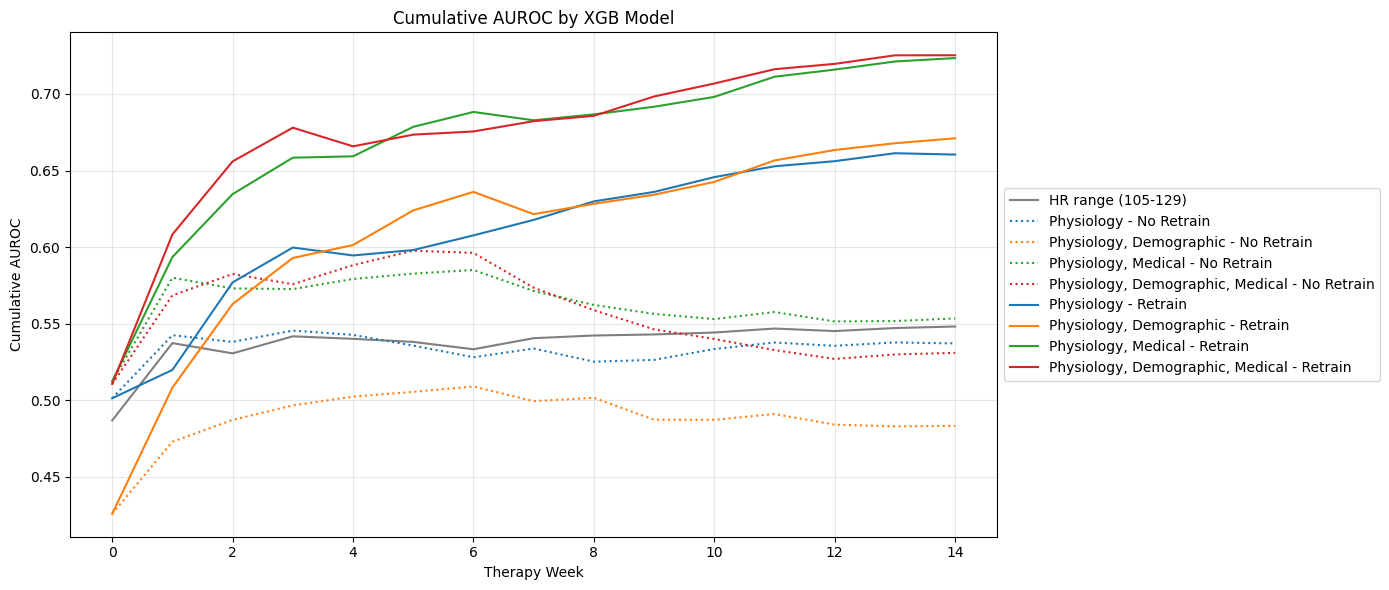

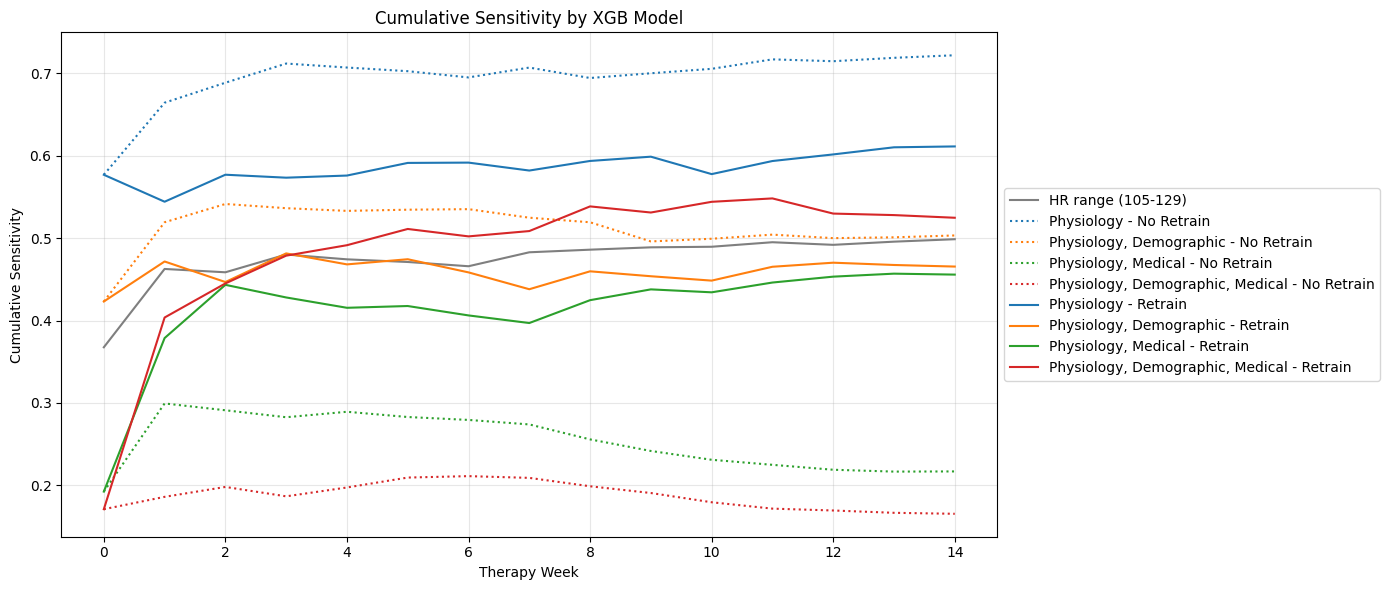

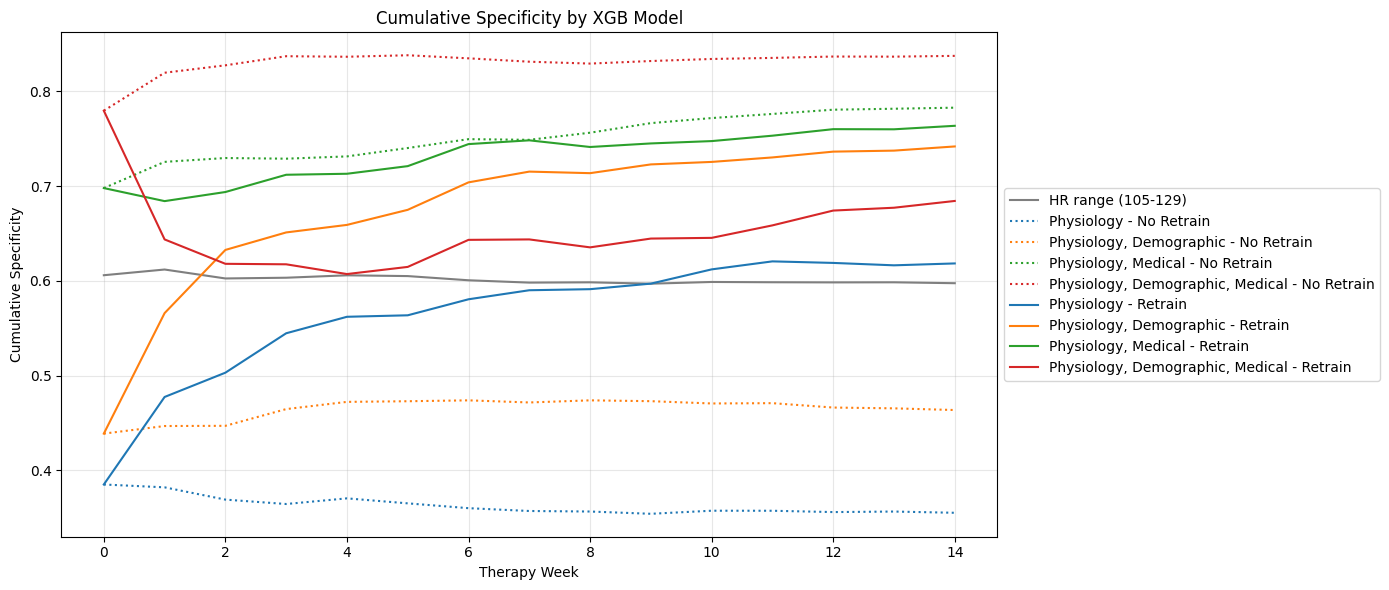

Week 0  \
                                                                      Sensitivity   
Model                                Feature Set                                    
HR range (reference)                 HR moving average                       0.37   
Static LR                            Physiology                              0.31   
                                     Physiology, Demographic                 0.26   
                                     Physiology, Medical                     0.79   
                                     Physiology, Demographic, Medical        0.54   
Individualized LR, retrained weekly  Physiology                              0.31   
                                     Physiology, Demographic                 0.26   
                                     Physiology, Medical                     0.79   
                                     Physiology, Demographic, Medical        0.54   
Static XGB                           Physiology                              0.58   
                                     Physiology, Demographic                 0.42   
                                     Physiology, Medical                     0.19   
                                     Physiology, Demographic, Medical        0.17   
Individualized XGB, retrained weekly Physiology                              0.58   
                                     Physiology, Demographic                 0.42   
                                     Physiology, Medical                     0.19   
                                     Physiology, Demographic, Medical        0.17   

                                                                                   \
                                                                      Specificity   
Model                                Feature Set                                    
HR range (reference)                 HR moving average                       0.61   
Static LR                            Physiology                              0.77   
                                     Physiology, Demographic                 0.78   
                                     Physiology, Medical                     0.32   
                                     Physiology, Demographic, Medical        0.61   
Individualized LR, retrained weekly  Physiology                              0.77   
                                     Physiology, Demographic                 0.78   
                                     Physiology, Medical                     0.32   
                                     Physiology, Demographic, Medical        0.61   
Static XGB                           Physiology                              0.39   
                                     Physiology, Demographic                 0.44   
                                     Physiology, Medical                     0.70   
                                     Physiology, Demographic, Medical        0.78   
Individualized XGB, retrained weekly Physiology                              0.39   
                                     Physiology, Demographic                 0.44   
                                     Physiology, Medical                     0.70   
                                     Physiology, Demographic, Medical        0.78   

                                                                             \
                                                                      AUROC   
Model                                Feature Set                              
HR range (reference)                 HR moving average                 0.49   
Static LR                            Physiology                        0.57   
                                     Physiology, Demographic           0.57   
                                     Physiology, Medical               0.60   
                                     Physiology, Demographic, Medical  0.59   
Individualized LR, retrained weekly  Phys

In [219]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score

from modeling import specificity_score

model_friendly_names = {
    "lrl2": "LR",
    "xgboost": "XGB",
}
weeks = (0, 14)


def plot_weekly_cum_metric(
    model: str, metric_name: str, weeks: tuple[int, ...], metric_fn
):
    def weekly_cum_metric(results, metric_fn):
        results = [r for r in results if r[0] <= weeks[-1]]
        metrics = []
        all_y_pred_proba = np.empty((0, 2))
        all_y_pred = np.array([])
        all_y_true = np.array([])
        for week, y_pred_proba, y_pred, y_true, _ in results:
            all_y_pred_proba = np.concatenate([all_y_pred_proba, y_pred_proba])
            all_y_pred = np.concatenate([all_y_pred, y_pred])
            all_y_true = np.concatenate([all_y_true, y_true])

            if metric_fn is roc_auc_score:
                metric = metric_fn(all_y_true, all_y_pred_proba[:, 1])
            else:
                metric = metric_fn(all_y_true, all_y_pred)
            metrics.append((week, metric))
        return metrics

    hr_cum_auc = weekly_cum_metric(hr_model_results, metric_fn)
    no_retrain_watch_cum_auc = weekly_cum_metric(
        no_retrain_results[model]["watch"], metric_fn
    )
    no_retrain_demographic_cum_auc = weekly_cum_metric(
        no_retrain_results[model]["watch_demographic"], metric_fn
    )
    no_retrain_medical_metric = weekly_cum_metric(
        no_retrain_results[model]["watch_medical"], metric_fn
    )
    no_retrain_all_features_metric = weekly_cum_metric(
        no_retrain_results[model]["watch_demographic_medical"], metric_fn
    )
    retrain_watch_cum_auc = weekly_cum_metric(
        retrain_dyad_results[model]["watch"], metric_fn
    )
    retrain_demographic_cum_auc = weekly_cum_metric(
        retrain_dyad_results[model]["watch_demographic"], metric_fn
    )
    retrain_medical_metric = weekly_cum_metric(
        retrain_dyad_results[model]["watch_medical"], metric_fn
    )
    retrain_medical_cum_auc = weekly_cum_metric(
        retrain_dyad_results[model]["watch_demographic_medical"], metric_fn
    )

    plt.figure(figsize=(14, 6))
    plt.plot(*zip(*hr_cum_auc), label="HR range (105-129)", color="tab:grey")

    plt.plot(
        *zip(*no_retrain_watch_cum_auc), label="Physiology - No Retrain", linestyle=":"
    )
    plt.plot(
        *zip(*no_retrain_demographic_cum_auc),
        label="Physiology, Demographic - No Retrain",
        linestyle=":",
    )
    plt.plot(
        *zip(*no_retrain_medical_metric),
        label="Physiology, Medical - No Retrain",
        linestyle=":",
    )
    plt.plot(
        *zip(*no_retrain_all_features_metric),
        label="Physiology, Demographic, Medical - No Retrain",
        linestyle=":",
    )

    plt.plot(
        *zip(*retrain_watch_cum_auc),
        label="Physiology - Retrain",
        color="tab:blue",
    )
    plt.plot(
        *zip(*retrain_demographic_cum_auc),
        label="Physiology, Demographic - Retrain",
        color="tab:orange",
    )
    plt.plot(
        *zip(*retrain_medical_metric),
        label="Physiology, Medical - Retrain",
        color="tab:green",
    )
    plt.plot(
        *zip(*retrain_medical_cum_auc),
        label="Physiology, Demographic, Medical - Retrain",
        color="tab:red",
    )

    plt.xlabel("Therapy Week")
    plt.ylabel(f"Cumulative {metric_name}")
    plt.title(f"Cumulative {metric_name} by {model_friendly_names[model]} Model")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def get_final_metrics(weeks: tuple[int, ...]):
    def get_final_metric(results, metric_fn):
        all_y_pred_proba = np.empty((0, 2))
        all_y_pred = np.array([])
        all_y_true = np.array([])
        for _, y_pred_proba, y_pred, y_true, _ in results:
            all_y_pred_proba = np.concatenate([all_y_pred_proba, y_pred_proba])
            all_y_pred = np.concatenate([all_y_pred, y_pred])
            all_y_true = np.concatenate([all_y_true, y_true])
        if metric_fn is roc_auc_score:
            return metric_fn(all_y_true, all_y_pred_proba[:, 1])
        else:
            return metric_fn(all_y_true, all_y_pred)

    def results_for_model(model: str):
        name = model_friendly_names[model]
        return [
            (f"Static {name}", "Physiology", no_retrain_results[model]["watch"]),
            (
                f"Static {name}",
                "Physiology, Demographic",
                no_retrain_results[model]["watch_demographic"],
            ),
            (
                f"Static {name}",
                "Physiology, Medical",
                no_retrain_results[model]["watch_medical"],
            ),
            (
                f"Static {name}",
                "Physiology, Demographic, Medical",
                no_retrain_results[model]["watch_demographic_medical"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology",
                retrain_dyad_results[model]["watch"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology, Demographic",
                retrain_dyad_results[model]["watch_demographic"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology, Medical",
                retrain_dyad_results[model]["watch_medical"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology, Demographic, Medical",
                retrain_dyad_results[model]["watch_demographic_medical"],
            ),
        ]

    model_results = (
        [
            ("HR range (reference)", "HR moving average", hr_model_results),
        ]
        + results_for_model("lrl2")
        + results_for_model("xgboost")
    )

    rows = []
    for model, feature_set, results in model_results:
        row = {
            "Model": model,
            "Feature Set": feature_set,
        }
        for week in weeks:
            up_to_week_results = [r for r in results if r[0] <= week]
            auroc = get_final_metric(up_to_week_results, roc_auc_score)
            sensitivity = get_final_metric(up_to_week_results, recall_score)
            specificity = get_final_metric(up_to_week_results, specificity_score)
            row.update(
                {
                    (f"Week {week}", "Sensitivity"): round(sensitivity, 2),
                    (f"Week {week}", "Specificity"): round(specificity, 2),
                    (f"Week {week}", "AUROC"): round(auroc, 2),
                }
            )
        rows.append(row)
    df = pd.DataFrame(rows).set_index(["Model", "Feature Set"])
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    return df


plot_weekly_cum_metric("xgboost", "AUROC", weeks, roc_auc_score)
plot_weekly_cum_metric("xgboost", "Sensitivity", weeks, recall_score)
plot_weekly_cum_metric("xgboost", "Specificity", weeks, specificity_score)

# Copy and paste into Word
get_final_metrics(weeks).to_clipboard()
# Gets displayed
get_final_metrics(weeks)